In [56]:
import pandas as pd 
import seaborn as sns
import numpy as np
import pylab
from scipy import interpolate
from scipy.optimize import curve_fit
import math 
from CompSample import linfit


NASA_data = pd.read_csv('NASA archive data 2.csv', delimiter=',')
NASA_data.head()

,discoverymethod,rv_flag,tran_flag,micro_flag,ima_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_lum,st_lumerr1,st_lumerr2,st_lumlim
0,Radial Velocity,1,0,0,0,NaN,NaN,NaN,NaN,1.21,...,NaN,NaN,2.60,0.40,-0.30,0.0,NaN,NaN,NaN,NaN
1,Radial Velocity,1,0,0,0,326.03000,0.32,-0.32,0.0,1.29,...,-2.00,0.0,2.70,0.30,-0.30,0.0,2.243,0.071,-0.085,0.0
2,Radial Velocity,1,0,0,0,516.22000,3.25,-3.25,0.0,1.54,...,-1.84,0.0,1.80,0.25,-0.25,0.0,NaN,NaN,NaN,NaN
3,Radial Velocity,1,0,0,0,NaN,NaN,NaN,NaN,1.51,...,NaN,NaN,1.70,0.40,-0.30,0.0,NaN,NaN,NaN,NaN
4,Radial Velocity,1,0,0,0,516.21997,3.20,-3.20,0.0,1.53,...,-2.84,0.0,2.78,0.69,-0.69,0.0,NaN,NaN,NaN,NaN


In [57]:
std = np.std(NASA_data['pl_masse'])
mean = np.nanmean(NASA_data['pl_masse'])
upper_bound = mean + 3* std
NASA_data = NASA_data[NASA_data['pl_masse']<upper_bound]

In [58]:
NASA_data2 = pd.DataFrame({'radius':NASA_data['pl_rade'], 'mass':NASA_data['pl_masse'], 'temp':NASA_data['pl_eqt'], 'rad_err':NASA_data['pl_radeerr1']})
NASA_data2 = NASA_data2.sort_values(by='mass')
NASA_data2.dropna(inplace=True)

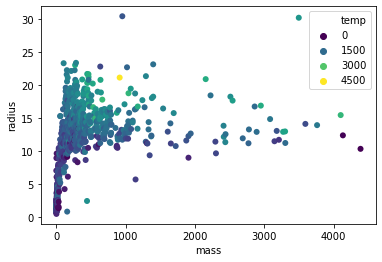

In [59]:
ax = sns.scatterplot(x='mass', y='radius', marker='o', hue='temp',data= NASA_data2, linewidth=0, palette='viridis')

In [52]:
def func(x, a, b):
    #for value in x: 
    #    return a* np.log(x) + b 
    return a * x + b 

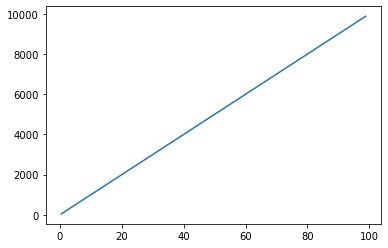

In [30]:
y = func(NASA_data2['mass'], 100, 0)
pylab.plot(NASA_data2['mass'], y)

In [20]:
#popt, pcov = curve_fit(linfit, NASA_data2['mass'] , NASA_data2['radius'], p0=[10])

In [31]:
popt, pcov = curve_fit(func, NASA_data2['mass'] , NASA_data2['radius'], p0=[100,0])

In [32]:
popt

array([0.12479579, 1.41927096])

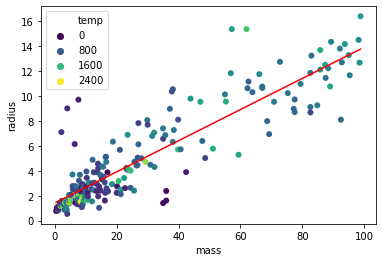

In [44]:
y = func(NASA_data2['mass'],popt[0], popt[1])
pylab.plot(NASA_data2['mass'], y, c='r')
ax = sns.scatterplot(x='mass', y='radius', marker='o', hue='temp',data= NASA_data2, linewidth=0, palette='viridis')
#ax.set(xscale='log')

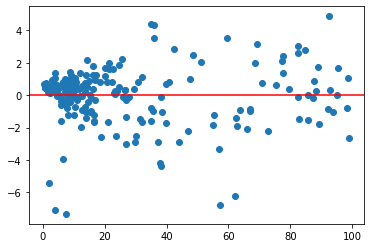

In [48]:
residuals = y - NASA_data2['radius']
pylab.plot(NASA_data2['mass'], residuals, ls='none', marker='o')
pylab.axhline(y=0, c='r')


In [34]:
def chisquared(y, error, ymodel):
    return np.sum((y-ymodel)**2/error**2)

In [35]:
chisquared(NASA_data2['radius'], NASA_data2['rad_err'], y)/len(NASA_data2['radius'])

217.81603928995625